In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA

In [3]:
df=pd.read_excel('MEU-Mobile KSD 2016.xlsx')
df

,USER_ID,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,Hold r,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,1.0,89.0,92.0,64.0,85.0,123.0,82.0,70.0,101.0,84.0,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.258065,88.071429,0.190971,0.288018
1,1.0,90.0,88.0,99.0,83.0,123.0,101.0,81.0,94.0,88.0,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,92.071429,0.186514,0.274194
2,1.0,87.0,90.0,83.0,65.0,79.0,73.0,96.0,62.0,64.0,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.225806,83.571429,0.186171,0.271889
3,1.0,71.0,81.0,62.0,72.0,83.0,94.0,89.0,104.0,73.0,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,81.428571,0.177943,0.278802
4,1.0,89.0,72.0,82.0,82.0,62.0,89.0,68.0,88.0,69.0,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,77.428571,0.163200,0.283410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,56.0,79.0,73.0,89.0,72.0,52.0,78.0,67.0,77.0,71.0,...,0.129032,0.225806,0.193548,0.129032,0.129032,0.258065,0.225806,77.714286,0.092229,0.184332
2907,56.0,65.0,98.0,73.0,75.0,62.0,67.0,85.0,68.0,64.0,...,0.258065,0.225806,0.225806,0.161290,0.225806,0.161290,0.290323,75.142857,0.133714,0.235023
2908,56.0,88.0,85.0,71.0,63.0,104.0,81.0,85.0,80.0,82.0,...,0.225806,0.258065,0.290323,0.322581,0.322581,0.225806,0.258065,77.214286,0.153600,0.267281
2909,56.0,99.0,98.0,80.0,95.0,71.0,76.0,70.0,78.0,54.0,...,0.225806,0.225806,0.258065,0.225806,0.193548,0.225806,0.354839,74.714286,0.111429,0.258065


In [3]:
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes.value_counts())
print("\nMissing values:\n", df.isna().sum().sort_values(ascending=False).head(10))

Dataset shape: (2911, 72)

Data types:
 float64    72
Name: count, dtype: int64

Missing values:
 USER_ID         55
Hold .          55
Hold t          55
Hold i          55
Hold e          55
Hold Shift      55
Hold 5          55
Hold Shift.1    55
Hold Caps       55
Hold r          55
dtype: int64


<Figure size 1200x600 with 0 Axes>

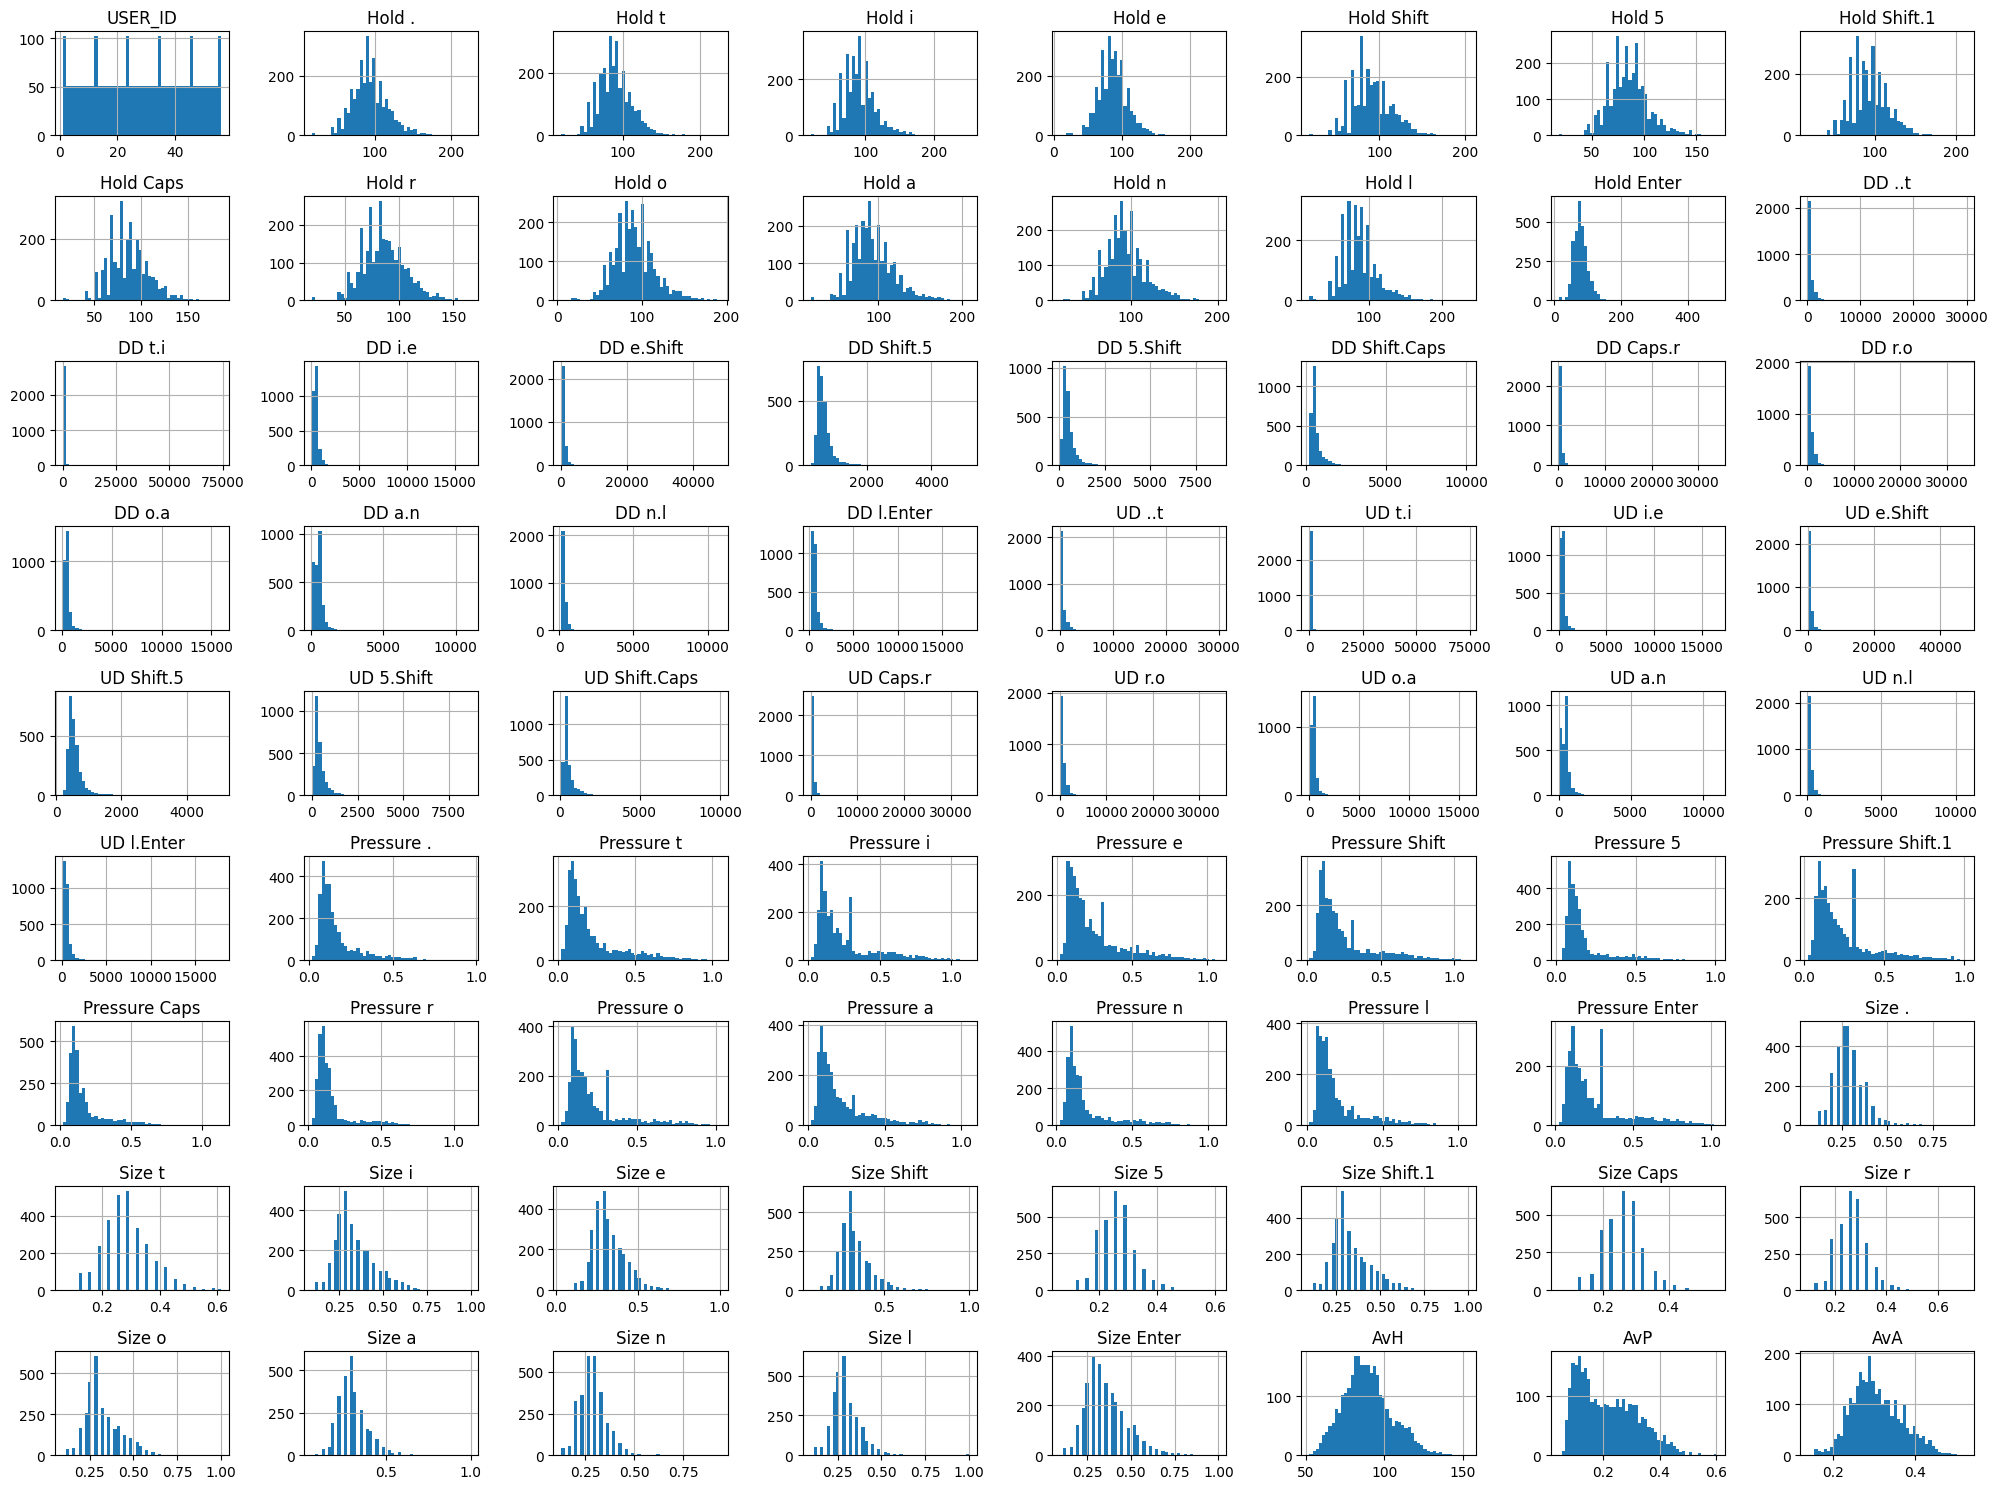

In [4]:
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['float64']).hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [5]:
df_cleaned = df.dropna(subset=['USER_ID'])

In [6]:
print(f"Cleaned shape: {df_cleaned.shape}")
df_cleaned.reset_index(drop=True, inplace=True)
print(df_cleaned.head())

Cleaned shape: (2856, 72)
   USER_ID  Hold .  Hold t  Hold i  Hold e  Hold Shift  Hold 5  Hold Shift.1  \
0      1.0    89.0    92.0    64.0    85.0       123.0    82.0          70.0   
1      1.0    90.0    88.0    99.0    83.0       123.0   101.0          81.0   
2      1.0    87.0    90.0    83.0    65.0        79.0    73.0          96.0   
3      1.0    71.0    81.0    62.0    72.0        83.0    94.0          89.0   
4      1.0    89.0    72.0    82.0    82.0        62.0    89.0          68.0   

   Hold Caps  Hold r  ...  Size Caps    Size r    Size o    Size a    Size n  \
0      101.0    84.0  ...   0.225806  0.225806  0.322581  0.290323  0.225806   
1       94.0    88.0  ...   0.225806  0.225806  0.322581  0.322581  0.258065   
2       62.0    64.0  ...   0.225806  0.193548  0.290323  0.322581  0.225806   
3      104.0    73.0  ...   0.225806  0.225806  0.258065  0.290323  0.225806   
4       88.0    69.0  ...   0.290323  0.225806  0.322581  0.258065  0.225806   

     Size l 

C:\Users\shaur\AppData\Local\Temp\ipykernel_12648\3150401893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='USER_ID', palette='viridis')


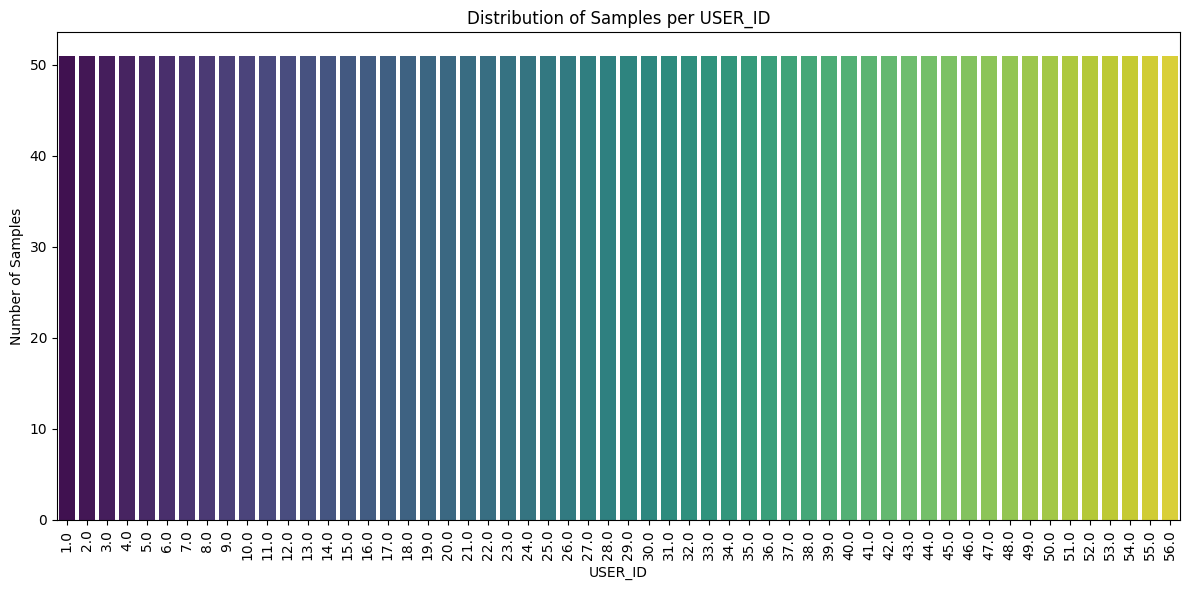

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='USER_ID', palette='viridis')
plt.title('Distribution of Samples per USER_ID')
plt.xlabel('USER_ID')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
summary_stats = df_cleaned.drop(columns=['USER_ID']).describe()
print(summary_stats.head())

            Hold .       Hold t       Hold i       Hold e   Hold Shift  \
count  2856.000000  2856.000000  2856.000000  2856.000000  2856.000000   
mean     94.817577    89.774860    91.097689    87.083333    91.549370   
std      23.236046    20.987113    22.992405    20.687536    22.757913   
min      18.000000    20.000000    20.000000     9.000000    19.000000   
25%      80.000000    75.000000    75.000000    73.000000    77.000000   

            Hold 5  Hold Shift.1    Hold Caps       Hold r       Hold o  ...  \
count  2856.000000   2856.000000  2856.000000  2856.000000  2856.000000  ...   
mean     84.568978     93.727941    86.810924    86.292717    91.451681  ...   
std      18.968962     22.184260    21.014413    19.645914    23.591602  ...   
min      18.000000     18.000000    16.000000    20.000000     5.000000  ...   
25%      73.000000     79.000000    71.000000    73.000000    75.000000  ...   

         Size Caps       Size r       Size o       Size a       Size n  \


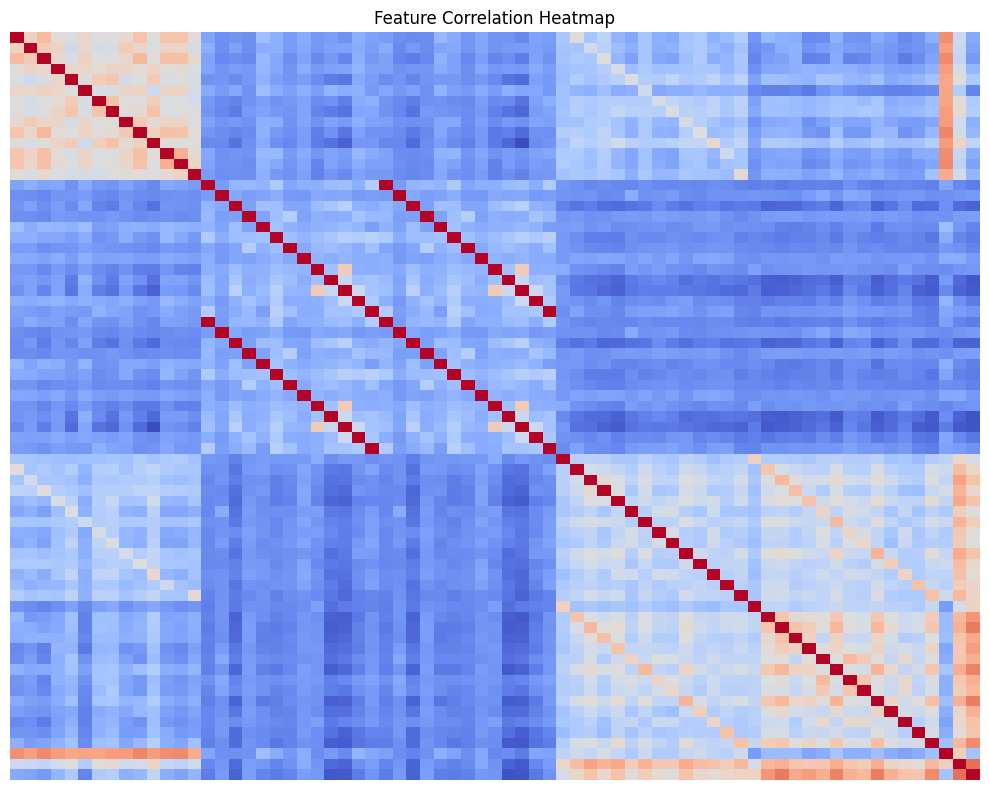

In [9]:
correlation_matrix = df_cleaned.drop(columns=['USER_ID']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=False)
plt.title('Feature Correlation Heatmap')
plt.axis('off')  # Too many features to label clearly
plt.tight_layout()
plt.show()


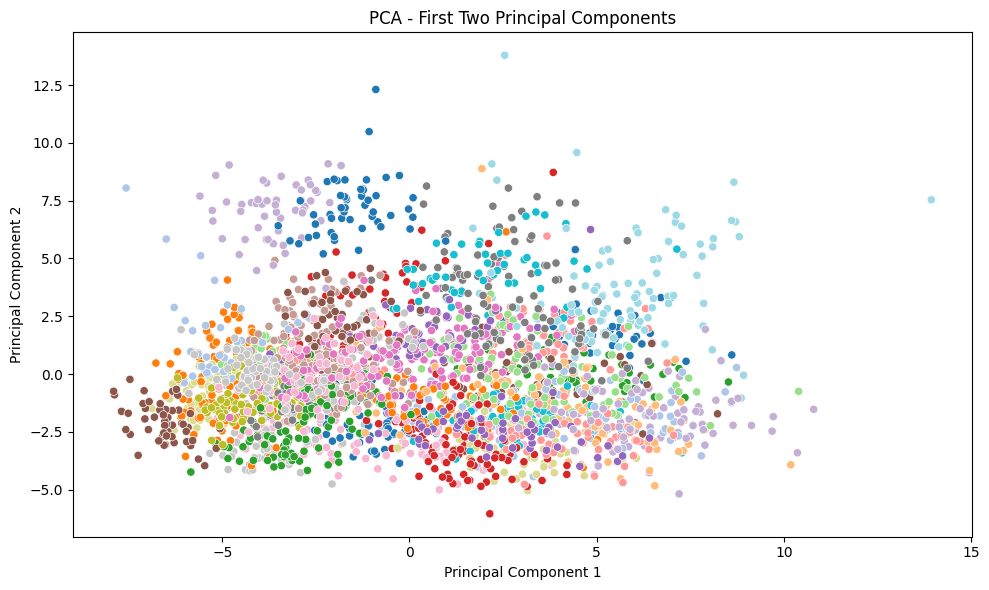

In [10]:
X = df_cleaned.drop(columns=['USER_ID'])
y = df_cleaned['USER_ID']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['USER_ID'] = y.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='USER_ID', palette='tab20', legend=None)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

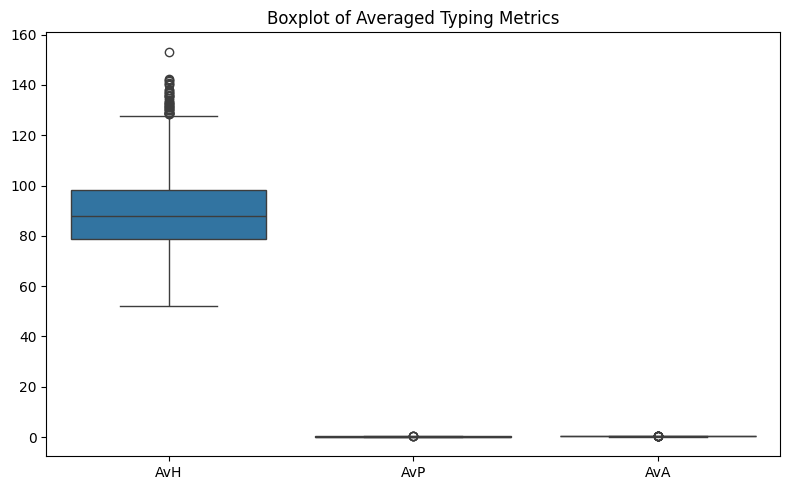

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned[['AvH', 'AvP', 'AvA']])
plt.title('Boxplot of Averaged Typing Metrics')
plt.tight_layout()
plt.show()

In [32]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Performance")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance
[[7 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 9 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       1.00      0.70      0.82        10
           2       0.57      0.80      0.67        10
           3       0.73      0.80      0.76        10
           4       1.00      0.70      0.82        10
           5       0.67      0.80      0.73        10
           6       1.00      0.90      0.95        10
           7       0.90      0.82      0.86        11
           8       0.42      0.50      0.45        10
           9       0.89      0.80      0.84        10
          10       0.85      1.00      0.92        11
          11       0.88      0.70      0.78        10
          12       1.00      0.90      0.95        10
          13       0.78      0.70      0.74        10
          14       0.92      1.00    

In [36]:
xyz = []


xyz.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, average='macro'),
    "Recall": recall_score(y_test, y_pred_lr, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_lr, average='macro')
})


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Train
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate
print("KNN Performance")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Performance
[[8 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 7]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.60      0.60      0.60        10
           2       0.50      0.50      0.50        10
           3       0.44      0.80      0.57        10
           4       0.60      0.60      0.60        10
           5       0.37      0.70      0.48        10
           6       0.80      0.80      0.80        10
           7       0.71      0.91      0.80        11
           8       0.39      0.70      0.50        10
           9       0.50      0.30      0.38        10
          10       0.57      0.36      0.44        11
          11       0.88      0.70      0.78        10
          12       0.75      0.90      0.82        10
          13       0.83      0.50      0.62        10
          14       1.00      1.00      1.00        11

In [ ]:



xyz.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, average='macro'),
    "Recall": recall_score(y_test, y_pred_knn, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_knn, average='macro')
})


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate
print("Decision Tree Performance")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance
[[4 0 0 ... 0 1 0]
 [0 4 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 4]]
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.40      0.40      0.40        10
           2       0.78      0.70      0.74        10
           3       1.00      0.50      0.67        10
           4       1.00      0.70      0.82        10
           5       0.33      0.40      0.36        10
           6       0.62      0.80      0.70        10
           7       0.70      0.64      0.67        11
           8       0.71      0.50      0.59        10
           9       0.58      0.70      0.64        10
          10       0.67      0.73      0.70        11
          11       0.45      0.50      0.48        10
          12       0.67      0.80      0.73        10
          13       0.67      0.60      0.63        10
          14       0.67      0.73      0.70

In [37]:
xyz.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, average='macro'),
    "Recall": recall_score(y_test, y_pred_dt, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_dt, average='macro')
})


In [22]:
import joblib
joblib.dump(dt_model,"decision_tree_model.pkl")

['decision_tree_model.pkl']

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Performance")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance
[[ 8  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10
           5       0.82      0.90      0.86        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        11
           8       0.77      1.00      0.87        10
           9       1.00      0.90      0.95        10
          10       0.92      1.00      0.96        11
          11       1.00      0.90      0.95        10
          12       0.91      1.00      0.95        10
          13       0.89      0.80      0.84        10
       

In [38]:
xyz.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, average='macro'),
    "Recall": recall_score(y_test, y_pred_rf, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_rf, average='macro')
})


In [21]:
import joblib
joblib.dump(rf_model,"random_forest_model.pkl")

['random_forest_model.pkl']

In [17]:
from sklearn.svm import SVC

# Train
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("SVM Performance")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Performance
[[ 8  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.86      0.60      0.71        10
           2       0.75      0.90      0.82        10
           3       0.80      0.80      0.80        10
           4       1.00      0.90      0.95        10
           5       0.90      0.90      0.90        10
           6       0.83      1.00      0.91        10
           7       0.83      0.91      0.87        11
           8       0.67      0.40      0.50        10
           9       1.00      0.70      0.82        10
          10       0.67      0.91      0.77        11
          11       1.00      0.70      0.82        10
          12       1.00      1.00      1.00        10
          13       0.75      0.60      0.67        10
          14     

In [39]:
xyz.append({
    "Model": "SVM",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, average='macro'),
    "Recall": recall_score(y_test, y_pred_svm, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_svm, average='macro')
})


In [19]:
from xgboost import XGBClassifier

# Train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("XGBoost Performance")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


d:\ML\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:54:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance
[[ 9  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.82      0.90      0.86        10
           2       0.80      0.80      0.80        10
           3       0.88      0.70      0.78        10
           4       1.00      1.00      1.00        10
           5       0.75      0.60      0.67        10
           6       1.00      1.00      1.00        10
           7       0.85      1.00      0.92        11
           8       0.78      0.70      0.74        10
           9       0.83      0.50      0.62        10
          10       0.79      1.00      0.88        11
          11       0.89      0.80      0.84        10
          12       1.00      0.90      0.95        10
          13       0.80      0.80      0.80        10
          14 

In [40]:
xyz.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb, average='macro'),
    "Recall": recall_score(y_test, y_pred_xgb, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_xgb, average='macro')
})


In [20]:
import joblib


joblib.dump(xgb_model, "xgboost_model.pkl")

# To load later
# xgb_model = joblib.load("xgboost_model.pkl")


['xgboost_model.pkl']

In [41]:
results_df = pd.DataFrame(xyz)


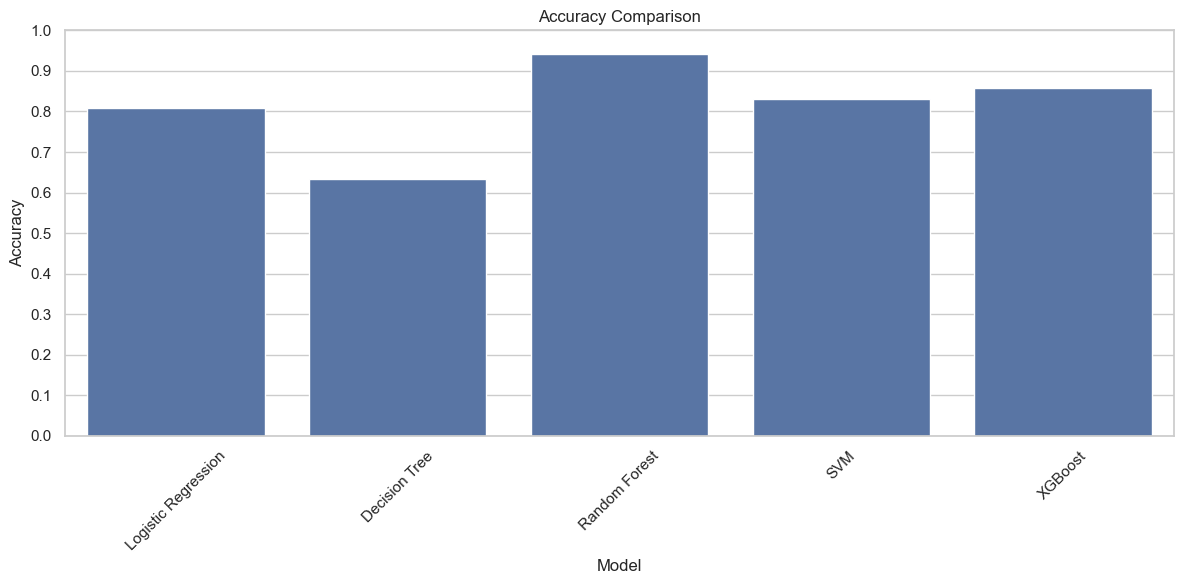

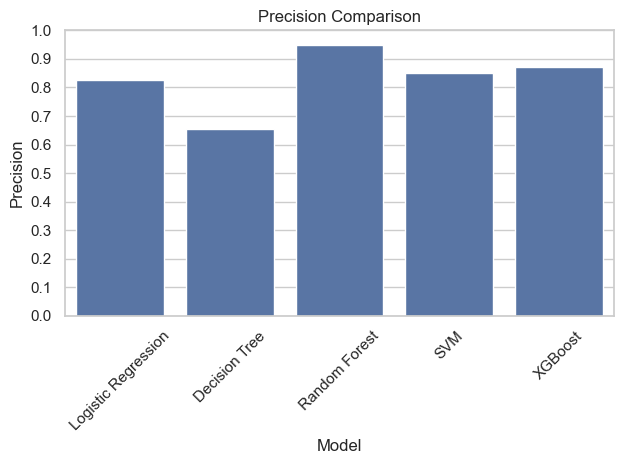

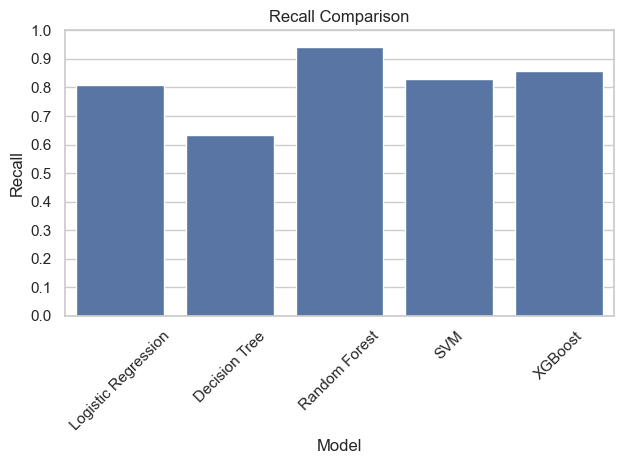

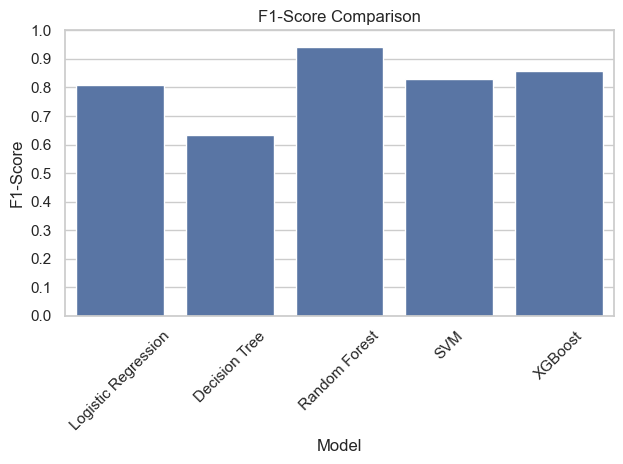

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    sns.barplot(data=results_df, x='Model', y=metric)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
